<a href="https://colab.research.google.com/github/Bhumika1524/Python_Projects/blob/main/Breast_cancer_with_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Breast Cancer Detection with K-Nearest Neighbours 



In [8]:
# Import libraries
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from matplotlib import rcParams
from matplotlib.cm import rainbow


In [9]:
#loading dataset
data = pd.read_csv('data.csv')

In [10]:
print("the data set is ".format(data.shape[0], data.shape[1]))

data.head()

the data set is 


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [11]:
data.drop(['id', 'Unnamed: 32'] , axis = 1, inplace = True)

print("The data set is ".format(data.shape[0], data.shape[1]))

data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

data.head()

The data set is 


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
#Chwck the datatype of the data
data.info()

#Check for existing null values
total_null_values = sum(data.isnull().sum())

print(total_null_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [13]:
#Display the detailed information of each and every attributes in the data set
data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [14]:
data.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


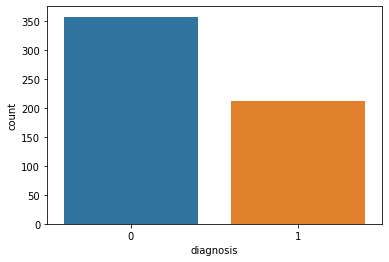

In [15]:
#Get the frequency of the cancer stages
sns.countplot(data['diagnosis'],label='Count')

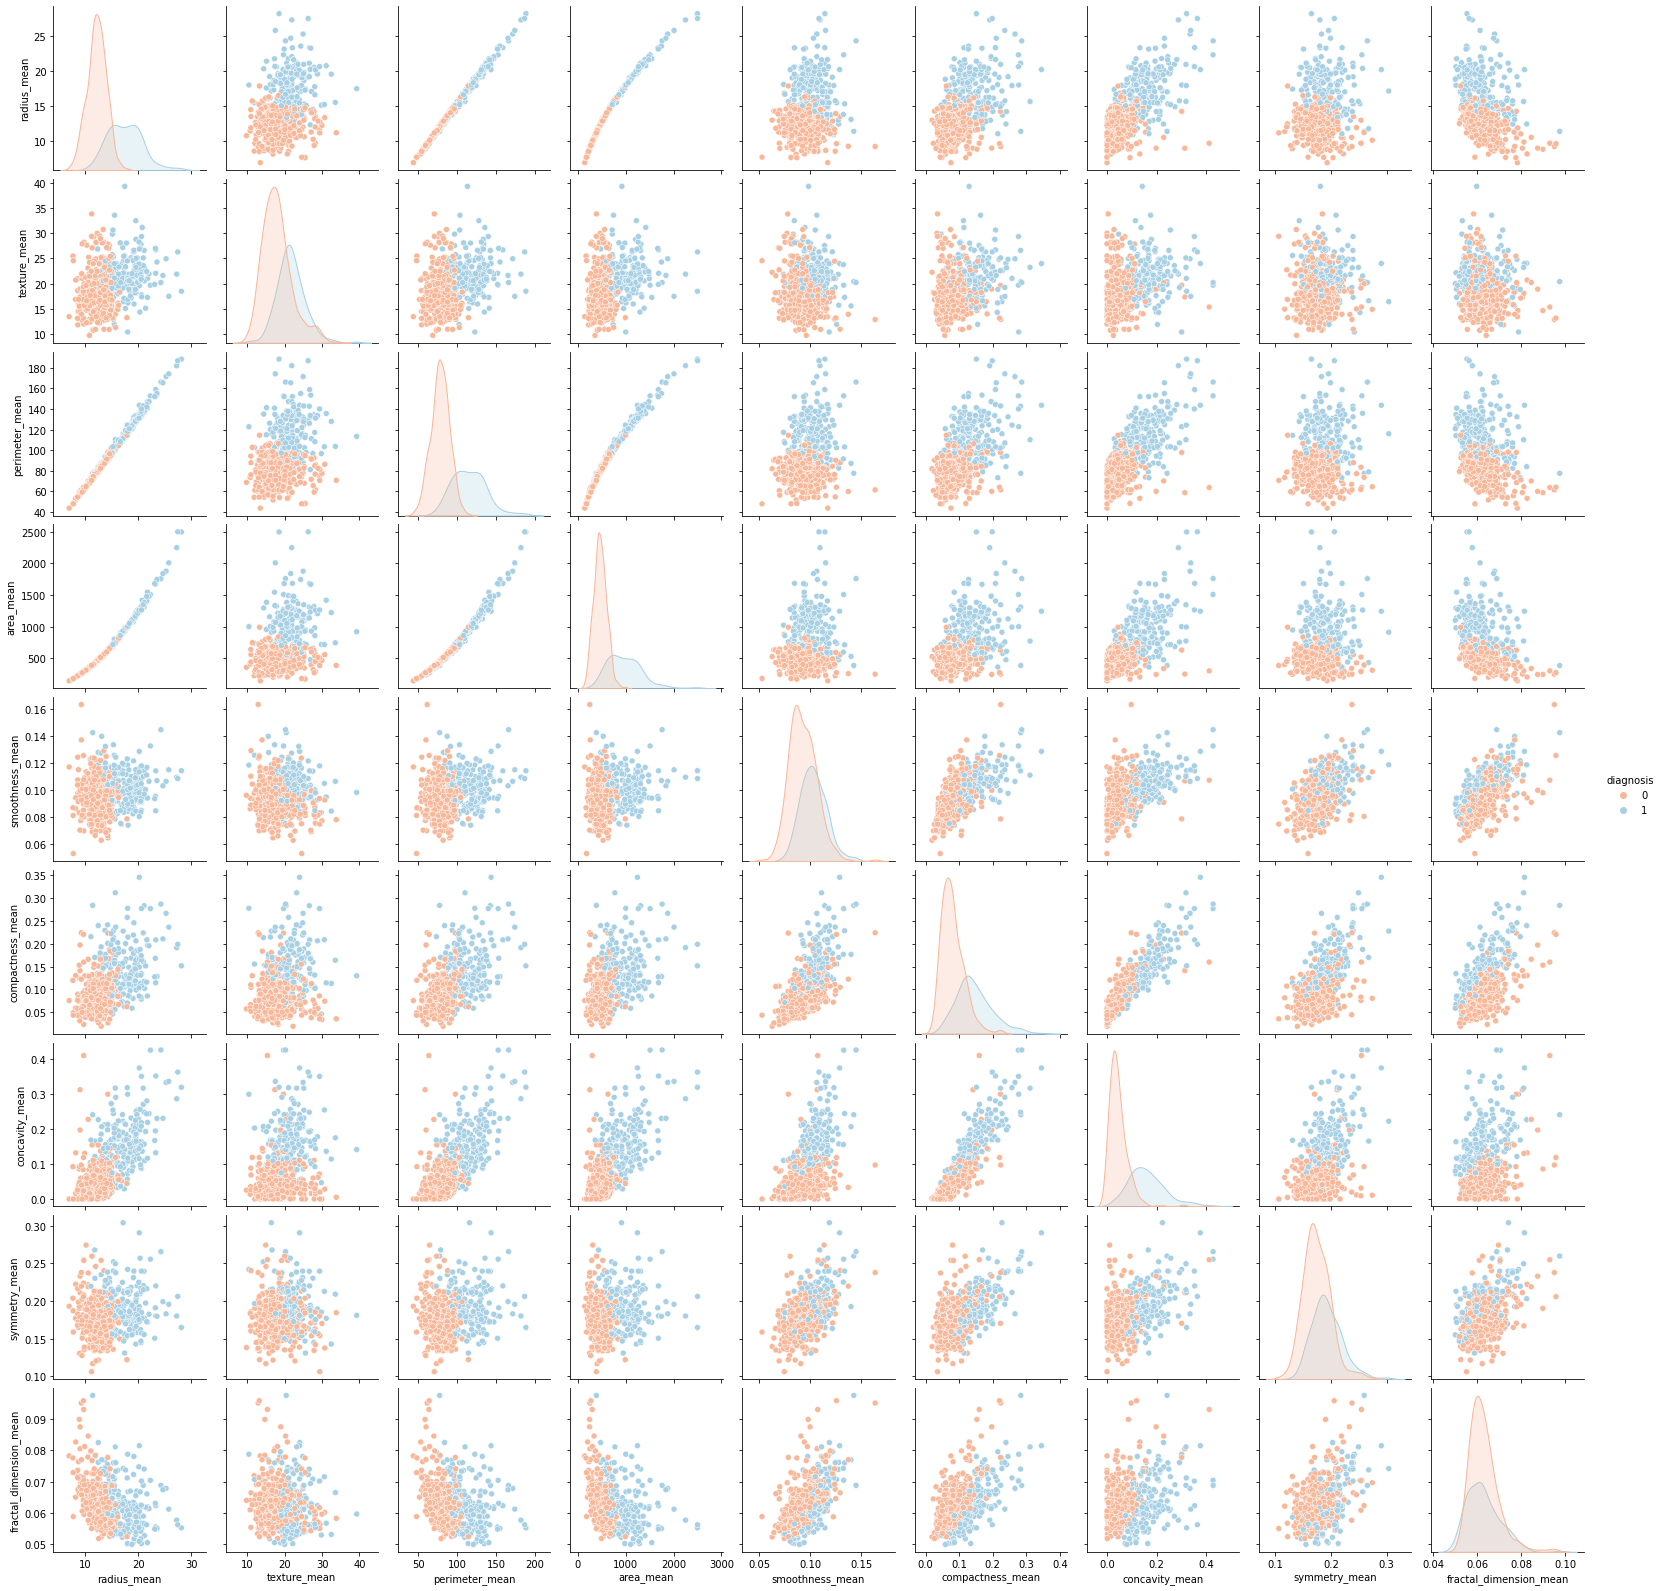

In [16]:
#Generating the scatter plot matrix with the 'mean' columns

#Creating a pair plot colored by continent with a density plot of the diagonal and format the scatter plots 

cols = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean']

sns.pairplot(data = data[cols], hue = 'diagnosis', palette = 'RdBu')

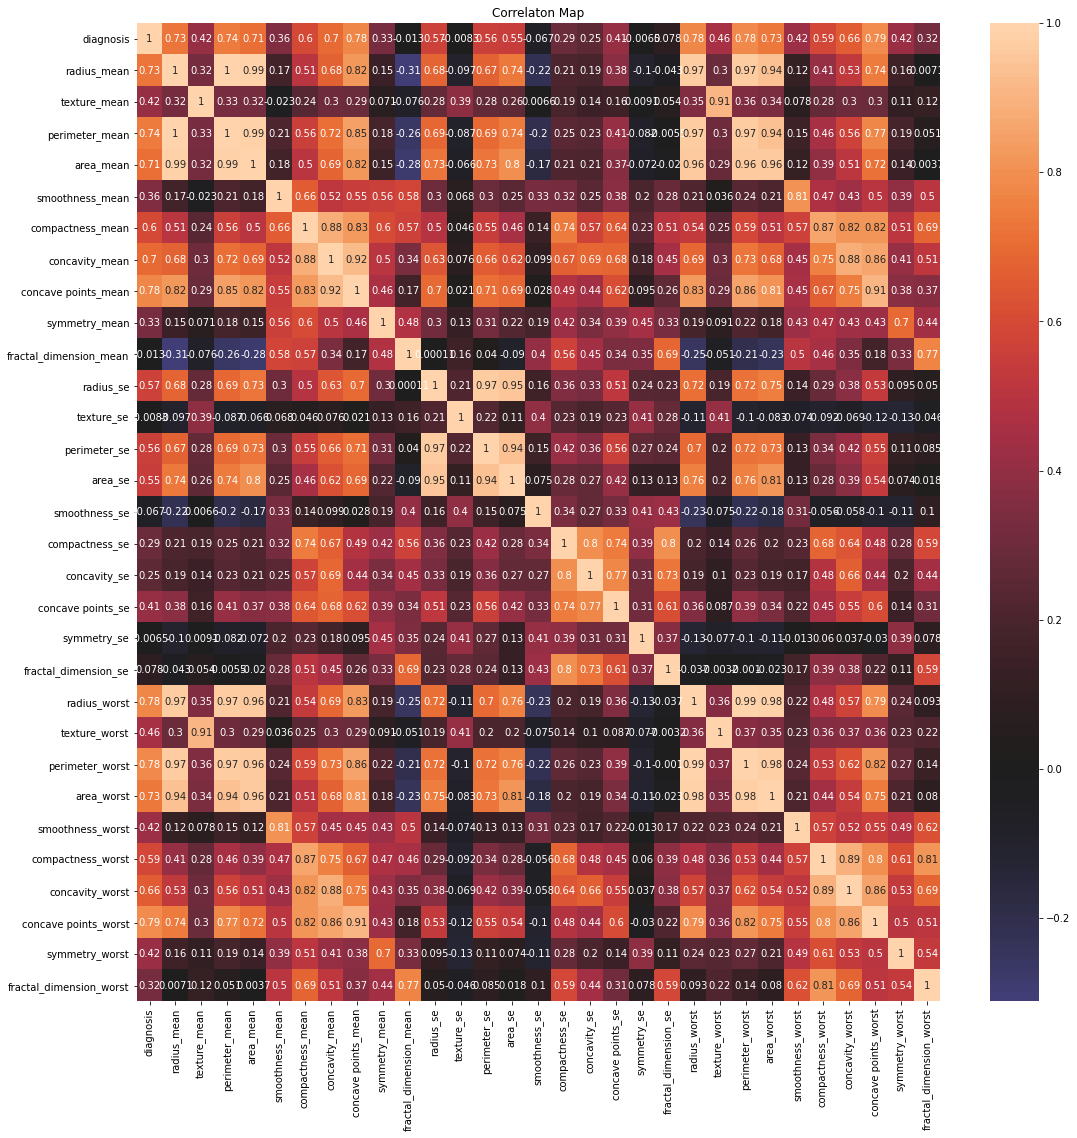

In [17]:
#To get accurate data visualization remove multi colinearityit meansremove the duplicate columns
#Check the correlation between features
#Analysis only for features_mean
#Visualise correlation by heatmap

plt.figure(figsize=(18,18))
sns.heatmap(data.corr(), center=0, annot=True)
plt.title('Correlaton Map')
plt.show()

In [18]:
#Split the feature Labels

#drop the 'diagnosis' column which represent the features which we are going to predict
X = data.drop('diagnosis', axis=1, inplace=False)

#Assign 'diagnosis' to column to Y variable
y=data['diagnosis']

print(X.head(2))
print(y.head(2))

   radius_mean  texture_mean  ...  symmetry_worst  fractal_dimension_worst
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902

[2 rows x 30 columns]
0    1
1    1
Name: diagnosis, dtype: int64


In [19]:
from sklearn.model_selection import train_test_split

#Seperate the data set by 70/30 for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 42)

print(X_train.shape,'\t is the shape of training features')
print(y_train.shape,' \t is the shape of training features')
print(X_test.shape,'  \t is the shape of training Labels')
print(y_test.shape,' \t is the shape of testing Labels')

(398, 30) 	 is the shape of training features
(398,)  	 is the shape of training features
(171, 30)   	 is the shape of training Labels
(171,)  	 is the shape of testing Labels


Import data to the Pandas Data Frame

In [20]:
#Implementation of KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
from sklearn.model_selection import cross_val_score

neighbors = []
cv_scores = []

#Perform 10-fold cross validation with K=5 of KNN(the n_neighbors parameters)

for k in range(1, 51, 2):
  neighbors.append(k)
  knn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn, X_train, y_train, cv = 10, scoring = 'accuracy')
  cv_scores.append(score.mean())

#Passing the entirety of X and y, not X_train or y_train, it takes care of spitting the data
#cv=10 for 10-fold
#Scoring='acuracy' for evaluation metric

score = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(score)

[0.89473684 0.8245614  0.89473684 0.94736842 0.92982456 0.92982456
 0.94736842 0.96491228 0.92982456 0.91071429]


The optimal number of K neighbors = 13


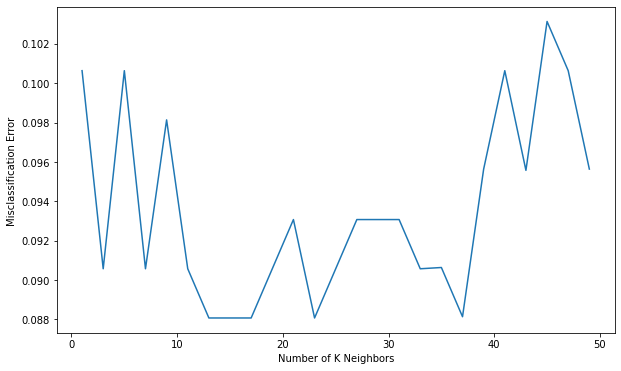

In [22]:
#Misclassification error versus k
MSE = [1-x for x in cv_scores]

#Determining the best K value
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of K neighbors = %d' %optimal_k)

#Plot misclassification error versus k
plt.figure(figsize=(10,6))
plt.plot(neighbors,MSE)
plt.xlabel('Number of K Neighbors')
plt.ylabel('Misclassification Error ')
plt.show()

In [23]:
model = KNeighborsClassifier(n_neighbors = 13)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Generate the summary of predictions (Classification Report) made by the classifier
from sklearn.metrics import classification_report

print('Classification Report \n\n')
print(classification_report(y_test,y_pred))


Classification Report 


              precision    recall  f1-score   support

           0       0.96      0.99      0.97       108
           1       0.98      0.92      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



In [24]:
#Accuracy Score of the prediction
from sklearn.metrics import accuracy_score

print('Accuracy of breast cancer prediction using KNN= ', accuracy_score(y_pred,y_test)*100)

Accuracy of breast cancer prediction using KNN=  96.49122807017544


Text(91.68, 0.5, 'Predicted Class')

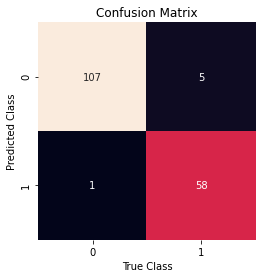

In [25]:
#Based on the test value generate the confusion matrix
from sklearn.metrics import confusion_matrix

#Summary of the predictions made by the classifier
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
